<div class="usecase-title"><b>Banner Poles Booking</b></div>

<div class="usecase-authors"><b>Authored by: </b> Jamie Hoang</div>

<div class="usecase-duration"><b>Duration:</b> 60 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Pandas, Geospatial analysis</div>
</div>

<div class="usecase-section-header">Scenario</div>

* As a Melbourne business owner, I want to find a suitable location which  to book banners to promote for my events or festival.
* As a council planner, I want to measure the potential streets that have high level of foot traffics to set up more banner poles.

<div class="usecase-section-header">What this use case will teach you</div>

To support Melbourne businesses and event organizers in choosing the most effective locations for booking banner poles to promote their events, this use case will analyze seasonal foot traffic patterns and identify areas with the highest visitor attraction. This analysis will involve aggregating data to extract insights and conducting seasonal analysis at quarterly and monthly intervals. The overarching objective is to develop interactive maps that visually illustrate the correlation between high-volume foot traffic and the placement of banner poles.

At the end of this use case you will:
- Use the maps to identify areas with a high volume of pedestrian traffic.
- Learn to create interactive maps
- Examine the correlation between the placement of banner poles and pedestrian traffic levels.

<div class="usecase-section-header">Relavant datasets:</div>

- Bookable Banner Poles\
The dataset show the location of all bookable banner in City of Melbourne and have other information about banner poles such as booking group, model, type.
- Pedestrian Counting System (counts per hour)\
The dataset includes hourly pedestrian counts recorded from March 2023 to March 2024 by pedestrian sensor devices positioned throughout the city. Updated monthly, this data offers insights into fluctuations in pedestrian activity over the course of a day.

- Pedestrian Counting System - Sensor Locations\
The dataset includes information about the status, position, and directionality of each pedestrian sensor device installed across the city.

#### Import required libraries

In [29]:
import requests
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt

# pip install geopandas
import geopandas as gpd
# pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


#### Data fetching 

Load <b>Bookable Banner Poles</b> data set

In [2]:
# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'bookable-banner-poles'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = "/Users/jamie/Documents/Jamie_MOP/key.txt"
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    banner = pd.read_csv(StringIO(url_content), delimiter=';')
    print(banner.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     asset_number                                  asset_description  \
135       1110444  Standard Banner Pole - Bourke St: William St -...   
490       1110665  Docklands Type 1 Banner Pole - Central Pier: O...   
503       1110565  Standard Banner Pole - Clarendon St: Flinders ...   
55        1110328  Standard Banner Pole - Spencer St:  Lonsdale S...   
260       1110259  Standard Banner Pole - Elizabeth St: Flinders ...   
687       1109902                    Banner Pole - Super Banner Pole   
139       1109975  Super Banner Pole - Spencer St: Corner Flinder...   
556       1110365  Standard Banner Pole - Lansdowne St: Wellingto...   
311       1110563  Standard Banner Pole - Clarendon St: Flinders ...   
567       1110193  Standard Banner Pole - Collins St: Elizabeth S...   

     banner_pole_type  book_group              model_descr_lupvalue  \
135               6.0        12.0     Banner Pole - Standard Banner   
490               4.0        30.0  Banner Pole - Type 1 - Docklan

In [3]:
print(f'The dataset has', len(banner) ,'records.')
banner.head()

The dataset has 859 records.


,asset_number,asset_description,banner_pole_type,book_group,model_descr_lupvalue,model_no_lupvalue,lat,lon,location
0,1110368,Standard Banner Pole - Lansdowne St: Wellingto...,6.0,62.0,Banner Pole - Standard Banner,310101-004,-37.814268,144.977428,"-37.81426836404757, 144.97742756833915"
1,1110057,Banner Pole - Super Banner Pole,2.0,79.0,Banner Pole - Super Banner Pole,310101-001,-37.809428,144.966548,"-37.80942811378078, 144.96654780374206"
2,1110093,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.800985,144.957241,"-37.80098530840636, 144.9572409533404"
3,1110096,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.800974,144.957269,"-37.80097426523944, 144.95726931044308"
4,1110108,Banner Pole - Super Banner Pole,2.0,59.0,Banner Pole - Super Banner Pole,310101-001,-37.801019,144.957138,"-37.801019397609785, 144.95713847866782"


Load <b>Pedestrian Counting System (counts per hour)</b> data set

In [4]:
# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'pedestrian-counting-system-monthly-counts-per-hour'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = "/Users/jamie/Documents/Jamie_MOP/key.txt"
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

       sensor_name                  timestamp  locationid  direction_1  \
299310    Col700_T  2023-06-11T00:00:00+00:00           9           72   
273077    SprFli_T  2024-01-16T19:00:00+00:00          75           30   
230538    Bou688_T  2023-08-22T21:00:00+00:00          58          794   
545967    FLDegC_T  2024-03-12T00:00:00+00:00          69          211   
41658     BouHbr_T  2023-07-06T06:00:00+00:00          10          275   
311686    BouBri_T  2023-06-03T18:00:00+00:00          57            2   
503749    WestWP_T  2024-02-09T08:00:00+00:00          71           10   
362060     Col12_T  2023-12-08T17:00:00+00:00          18          471   
90696         AG_T  2023-09-29T13:00:00+00:00          29           71   
340770      ACMI_T  2023-08-06T06:00:00+00:00          72          352   

        direction_2  total_of_directions                    location  
299310           93                  165  -37.81982992, 144.95102555  
273077           18                   48  -

In [5]:
print(f'The dataset has', len(pedestrian) ,'records.')
pedestrian.head()

The dataset has 549976 records.


,sensor_name,timestamp,locationid,direction_1,direction_2,total_of_directions,location
0,SprFli_T,2023-04-24T21:00:00+00:00,75,36,17,53,"-37.81515276, 144.97467661"
1,SprFli_T,2023-04-25T00:00:00+00:00,75,28,50,78,"-37.81515276, 144.97467661"
2,SprFli_T,2023-04-25T01:00:00+00:00,75,63,63,126,"-37.81515276, 144.97467661"
3,SprFli_T,2023-04-25T02:00:00+00:00,75,85,89,174,"-37.81515276, 144.97467661"
4,SprFli_T,2023-04-25T08:00:00+00:00,75,365,59,424,"-37.81515276, 144.97467661"


Load <b>Pedestrian Counting System - Sensor Locations</b> data set

In [6]:
# https://data.melbourne.vic.gov.au/explore/dataset/pedestrian-counting-system-monthly-counts-per-hour/information/
dataset_id = 'pedestrian-counting-system-sensor-locations'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
apikey = "/Users/jamie/Documents/Jamie_MOP/key.txt"
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1,  # all records
    'lang': 'en',
    'timezone': 'UTC',
    'api_key': apikey
}

# GET request
response = requests.get(url, params=params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    pedestrian_code = pd.read_csv(StringIO(url_content), delimiter=';')
    print(pedestrian_code.sample(10, random_state=999)) # Test
else:
    print(f'Request failed with status code {response.status_code}')

     location_id                                 sensor_description  \
60            65                          Swanston St - City Square   
139          155  narrm ngarrgu Library - Level 3 Children's Lib...   
29            96             Fitzroy Garden Visitor Centre Internal   
55            46                                  Pelham St (South)   
0              2                         Bourke Street Mall (South)   
24            76                            Macaulay Rd- Bellair St   
18            53                             Collins Street (North)   
100           40                       Lonsdale St-Spring St (West)   
64            70                                Errol Street (East)   
128          117              114 Flinders Street Car Park Footpath   

         sensor_name installation_date                         note  \
60           SwaCs_T        2020-03-12                          NaN   
139    narrLibL#C2_T        2023-10-23                          NaN   
29   

In [7]:
print(f'The dataset has', len(pedestrian_code) ,'records.')
pedestrian_code.head()

The dataset has 140 records.


,location_id,sensor_description,sensor_name,installation_date,note,location_type,status,direction_1,direction_2,latitude,longitude,location
0,2,Bourke Street Mall (South),Bou283_T,2009-03-30,NaN,Outdoor,A,East,West,-37.813807,144.965167,"-37.81380668, 144.96516718"
1,4,Town Hall (West),Swa123_T,2009-03-23,NaN,Outdoor,A,North,South,-37.814880,144.966088,"-37.81487988, 144.9660878"
2,6,Flinders Street Station Underpass,FliS_T,2009-03-25,Upgraded on 8/09/21,Outdoor,A,North,South,-37.819117,144.965583,"-37.81911705, 144.96558255"
3,8,Webb Bridge,WebBN_T,2009-03-24,NaN,Outdoor,A,North,South,-37.822935,144.947175,"-37.82293543, 144.9471751"
4,10,Victoria Point,BouHbr_T,2009-04-23,NaN,Outdoor,A,East,West,-37.818765,144.947105,"-37.81876474, 144.94710545"


#### Data Visualization

##### Counting daily and monthly pedestrians 

In [8]:
#split the timestamp column to Dates and Time columns
pedestrian['Dates'] = pd.to_datetime(pedestrian['timestamp']).dt.date
pedestrian['Time'] = pd.to_datetime(pedestrian['timestamp']).dt.time
pedestrian

,sensor_name,timestamp,locationid,direction_1,direction_2,total_of_directions,location,Dates,Time
0,SprFli_T,2023-04-24T21:00:00+00:00,75,36,17,53,"-37.81515276, 144.97467661",2023-04-24,21:00:00
1,SprFli_T,2023-04-25T00:00:00+00:00,75,28,50,78,"-37.81515276, 144.97467661",2023-04-25,00:00:00
2,SprFli_T,2023-04-25T01:00:00+00:00,75,63,63,126,"-37.81515276, 144.97467661",2023-04-25,01:00:00
3,SprFli_T,2023-04-25T02:00:00+00:00,75,85,89,174,"-37.81515276, 144.97467661",2023-04-25,02:00:00
4,SprFli_T,2023-04-25T08:00:00+00:00,75,365,59,424,"-37.81515276, 144.97467661",2023-04-25,08:00:00
...,...,...,...,...,...,...,...,...,...
549971,474Fl_T,2024-03-18T14:00:00+00:00,141,5,15,20,"-37.81997273, 144.95834911",2024-03-18,14:00:00
549972,Hammer1584_T,2024-03-18T02:00:00+00:00,142,349,285,634,"-37.81970749, 144.96795734",2024-03-18,02:00:00
549973,Hammer1584_T,2024-03-18T03:00:00+00:00,142,282,173,455,"-37.81970749, 144.96795734",2024-03-18,03:00:00
549974,Hammer1584_T,2024-03-18T08:00:00+00:00,142,260,261,521,"-37.81970749, 144.96795734",2024-03-18,08:00:00


In [9]:
#count the daily pedestrians by each sensor
daily_count = pedestrian.groupby(['Dates','sensor_name'])['total_of_directions'].sum().reset_index()
daily_count

,Dates,sensor_name,total_of_directions
0,2023-03-31,280Will_T,814
1,2023-03-31,488Mac_T,445
2,2023-03-31,574Qub_T,276
3,2023-03-31,ACMI_T,1899
4,2023-03-31,AG_T,1272
...,...,...,...
26216,2024-03-18,UM3_T,793
26217,2024-03-18,VAC_T,13078
26218,2024-03-18,WatCit_T,1108
26219,2024-03-18,WebBN_T,3676


In [10]:
#combine data to extract the sensors' location
daily_count = daily_count.merge(pedestrian_code[['sensor_description', 'sensor_name', 'longitude','latitude']], 
                 how = 'left', 
                 on = 'sensor_name')
daily_count.head()

,Dates,sensor_name,total_of_directions,sensor_description,longitude,latitude
0,2023-03-31,280Will_T,814,Flagstaff station (East),144.956902,-37.812463
1,2023-03-31,488Mac_T,445,Macaulay Rd (North),144.929734,-37.794324
2,2023-03-31,574Qub_T,276,Queensberry St - Errol St (South),144.949081,-37.803100
3,2023-03-31,ACMI_T,1899,Flinders St- ACMI,144.968728,-37.817263
4,2023-03-31,AG_T,1272,St Kilda Rd-Alexandra Gardens,144.968635,-37.819658


In [11]:
#check the missing values
daily_count.isnull().sum()

Dates                    0
sensor_name              0
total_of_directions      0
sensor_description     370
longitude              370
latitude               370
dtype: int64

In [12]:
#find the sensors which do not have location in sensor Dataframe
daily_count[daily_count['longitude'].isnull()]['sensor_name'].unique()

array(['BouBri_T', 'Bou655_T', 'Col892T'], dtype=object)

In [13]:
#extract the location of these sensors from pedestrian data
pedestrian[pedestrian['sensor_name'].isin(['BouBri_T', 'Bou655_T', 'Col892T'])].drop_duplicates('sensor_name')

,sensor_name,timestamp,locationid,direction_1,direction_2,total_of_directions,location,Dates,Time
472,BouBri_T,2023-04-28T14:00:00+00:00,57,59,40,99,"-37.8176735, 144.95025594",2023-04-28,14:00:00
572,Bou655_T,2023-04-29T02:00:00+00:00,73,131,116,247,"-37.81695684, 144.95415373",2023-04-29,02:00:00
75905,Col892T,2023-11-29T20:00:00+00:00,130,5,10,15,"-37.8204637, 144.94126826",2023-11-29,20:00:00


In [14]:
#Impute the missing location of specific sensors
daily_count.loc[daily_count['sensor_name'] == 'BouBri_T','longitude'] = daily_count.loc[daily_count['sensor_name'] == 'BouBri_T','longitude'].fillna(144.95025594)
daily_count.loc[daily_count.sensor_name == 'BouBri_T','latitude'] = daily_count.loc[daily_count.sensor_name == 'BouBri_T','latitude'].fillna(-37.8176735)

daily_count.loc[daily_count.sensor_name == 'Bou655_T','longitude'] = daily_count.loc[daily_count.sensor_name == 'Bou655_T','longitude'].fillna(144.95415373)
daily_count.loc[daily_count.sensor_name == 'Bou655_T','latitude'] = daily_count.loc[daily_count.sensor_name == 'Bou655_T','latitude'].fillna(-37.81695684)

daily_count.loc[daily_count.sensor_name == 'Col892T','longitude'] = daily_count.loc[daily_count.sensor_name == 'Col892T','longitude'].fillna(144.94126826)
daily_count.loc[daily_count.sensor_name == 'Col892T','latitude'] = daily_count.loc[daily_count.sensor_name == 'Col892T','latitude'].fillna(-37.8204637)

Create a draft version of interactive map for a particular date '2024-03-18'

In [15]:
m_1 = folium.Map(location=[-37.82401776, 144.95604426], tiles='cartodbpositron', zoom_start=14)

for idx, row in banner.iterrows():
    Marker([row['lat'], row['lon']]).add_to(m_1)

def color_producer(val):
    if val < 3000:
        return 'forestgreen'
    elif val < 8000:
        return 'darkorange'
    else:
        return 'darkred'

daily_count.Dates = pd.to_datetime(daily_count.Dates)

#choose a date to map
date = daily_count[daily_count.Dates == '2024-03-18'].reset_index(drop=True)

for idx, row in date.iterrows():
    Circle(
        [row['latitude'], row['longitude']],
        color=color_producer(date.iloc[idx]['total_of_directions'])).add_to(m_1)

# Display the map
m_1

The map displays pedestrian foot traffic with varying intensity levels:

*   Red circles represent areas with a daily pedestrian count exceeding 8000.
*   Orange circles indicate areas with pedestrian counts ranging between 3000 and 8000.
*   Green circles represent areas with pedestrian counts below 3000.

In [16]:
# Convert date column to datetime objects
pedestrian['Dates'] = pd.to_datetime(pedestrian['Dates']) 

#count the monthly pedestrians by each sensor
monthly_count = pedestrian.groupby([pedestrian['Dates'].dt.to_period('M'), 'sensor_name'])['total_of_directions'].sum().reset_index()
monthly_count

,Dates,sensor_name,total_of_directions
0,2023-03,280Will_T,814
1,2023-03,488Mac_T,445
2,2023-03,574Qub_T,276
3,2023-03,ACMI_T,1899
4,2023-03,AG_T,1272
...,...,...,...
1030,2024-03,VAC_T,213226
1031,2024-03,Vic_T,27791
1032,2024-03,WatCit_T,34976
1033,2024-03,WebBN_T,87542


In [17]:
#combine data to extract the sensors' location
monthly_count = monthly_count.merge(daily_count[['sensor_description', 'sensor_name', 'longitude','latitude']], 
                 how = 'left', 
                 on = 'sensor_name')
monthly_count.head()

,Dates,sensor_name,total_of_directions,sensor_description,longitude,latitude
0,2023-03,280Will_T,814,Flagstaff station (East),144.956902,-37.812463
1,2023-03,280Will_T,814,Flagstaff station (East),144.956902,-37.812463
2,2023-03,280Will_T,814,Flagstaff station (East),144.956902,-37.812463
3,2023-03,280Will_T,814,Flagstaff station (East),144.956902,-37.812463
4,2023-03,280Will_T,814,Flagstaff station (East),144.956902,-37.812463


In [18]:
#drop the duplicate rows after merging
monthly_count = monthly_count.drop_duplicates(['Dates', 'sensor_name']).reset_index(drop=True)

In [19]:
monthly_count.isnull().sum()

Dates                   0
sensor_name             0
total_of_directions     0
sensor_description     17
longitude               0
latitude                0
dtype: int64

### Time Series Analysis

In [37]:
sensor_one = daily_count.loc[daily_count.sensor_name=='ACMI_T', ['Dates', 'total_of_directions']]

In [38]:
sensor_one.set_index('Dates', inplace=True)

In [39]:
v2 = sensor_one.copy()
v2['Time'] = np.arange(len(sensor_one.index))
v2

,total_of_directions,Time
Dates,,
2023-03-31,1899,0
2023-04-01,14390,1
2023-04-02,13467,2
2023-04-03,10849,3
2023-04-04,11145,4
...,...,...
2024-03-14,10998,320
2024-03-15,9937,321
2024-03-16,11430,322


In [40]:
from sklearn.linear_model import LinearRegression

# Training data
X = v2.loc[:, ['Time']]  # features
y = v2.loc[:, 'total_of_directions']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)

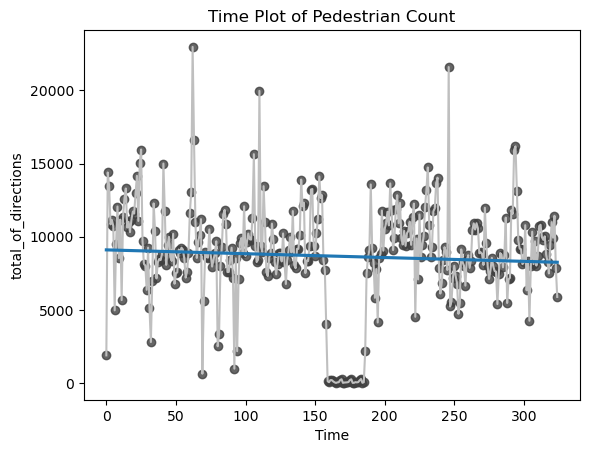

In [41]:
import seaborn as sns
fig, ax = plt.subplots()
ax.plot('Time', 'total_of_directions', data=v2, color='0.75')
ax = sns.regplot(x='Time', y='total_of_directions', data=v2, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Pedestrian Count')

In [45]:
v2['lag_1'] = v2.total_of_directions.shift(1)  # add to dataframe

X = v2.loc[:, ['lag_1']].dropna()  # features
y = v2.loc[:, 'total_of_directions']  # target
y, X = y.align(X, join='inner')  # drop corresponding values in target

# Create a LinearRegression instance and fit it to X and y.
model = LinearRegression()
model.fit(X, y)

#  Create Store the fitted values as a time series with
# the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

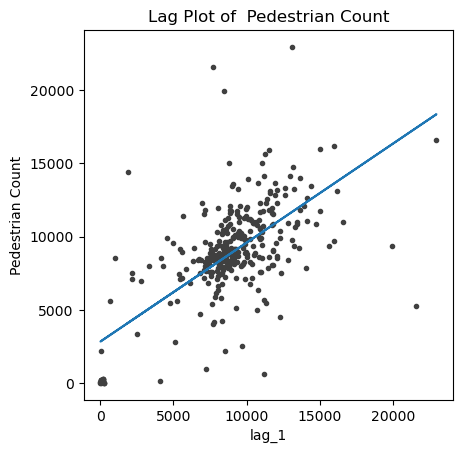

In [46]:
fig, ax = plt.subplots()
ax.plot(X['lag_1'], y, '.', color='0.25')
ax.plot(X['lag_1'], y_pred)
ax.set(aspect='equal', ylabel='Pedestrian Count', xlabel='lag_1', title='Lag Plot of  Pedestrian Count');

#### Trend analysis

In [97]:
avarage_count= daily_count.groupby('Dates').mean()['total_of_directions']
avarage_count

Dates
2023-03-31     1860.424658
2023-04-01    11706.780822
2023-04-02    10485.851351
2023-04-03    10255.189189
2023-04-04    10670.630137
                  ...     
2024-03-14    10820.081395
2024-03-15    10655.337209
2024-03-16    11759.674419
2024-03-17     8932.372093
2024-03-18     6900.848837
Name: total_of_directions, Length: 346, dtype: float64

[Text(0.5, 1.0, 'Time Plot of Pedestrian Count'),
 Text(0, 0.5, 'Pedestrian Count')]

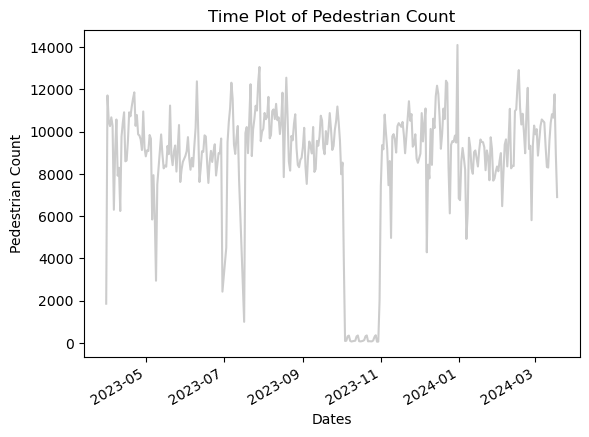

In [105]:
ax = avarage_count.plot(color='0.8')
ax.set(title="Time Plot of Pedestrian Count", ylabel="Pedestrian Count")

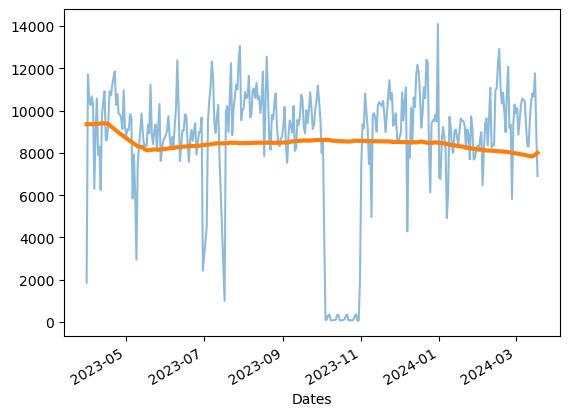

In [99]:
trend = avarage_count.rolling(window=325,center=True,min_periods=162).mean()
ax = avarage_count.plot( alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)

In [102]:
from statsmodels.tsa.deterministic import DeterministicProcess

y = avarage_count.copy()  # the target

# Instantiate `DeterministicProcess` with arguments
# appropriate for a cubic trend model
dp = DeterministicProcess(
    index=avarage_count.index.to_period('D'),  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,            # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

# Create the feature set for the dates given in y.index
X = dp.in_sample()

# Create features for a 90-day forecast.
X_fore = dp.out_of_sample(steps=90)

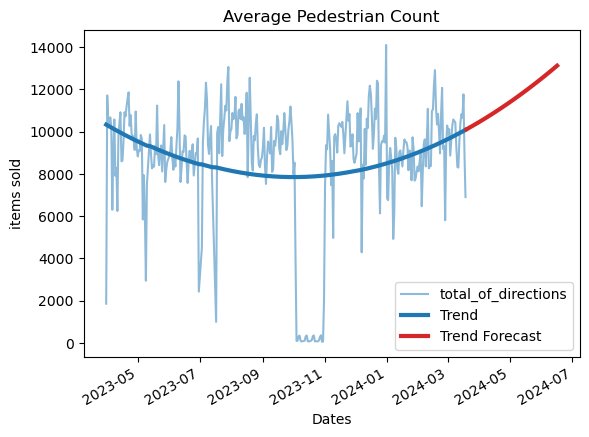

In [104]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot( alpha=0.5, title="Average Pedestrian Count", ylabel="items sold")
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend", color='C0')
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color='C3')
ax.legend()

In [95]:
model = LinearRegression()
model.fit(X, y)
model.predict(X)

array([[9104.40190656],
       [9101.79076469],
       [9099.17962281],
       [9096.56848094],
       [9093.95733907],
       [9091.34619719],
       [9088.73505532],
       [9086.12391345],
       [9083.51277157],
       [9080.9016297 ],
       [9078.29048783],
       [9075.67934595],
       [9073.06820408],
       [9070.45706221],
       [9067.84592033],
       [9065.23477846],
       [9062.62363659],
       [9060.01249471],
       [9057.40135284],
       [9054.79021097],
       [9052.17906909],
       [9049.56792722],
       [9046.95678535],
       [9044.34564347],
       [9041.7345016 ],
       [9039.12335973],
       [9036.51221785],
       [9033.90107598],
       [9031.28993411],
       [9028.67879223],
       [9026.06765036],
       [9023.45650849],
       [9020.84536661],
       [9018.23422474],
       [9015.62308287],
       [9013.01194099],
       [9010.40079912],
       [9007.78965725],
       [9005.17851537],
       [9002.5673735 ],
       [8999.95623163],
       [8997.345